In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
data = np.loadtxt("/global/cfs/cdirs/m4031/divijsharma/PNG/output_folder/k2overM.txt")

In [3]:
Plin = interpolate.InterpolatedUnivariateSpline(data[:,0],data[:,1],ext=3)

In [4]:
#Kaz's sim results

In [5]:
from nbodykit.lab import *
zout = 0.5
c = cosmology.Cosmology(h=0.6766, Omega0_cdm=0.309640, n_s=0.9665, m_ncdm=[], A_s=2.105e-9)
Plin_zout = cosmology.LinearPower(c, zout)

R corresponding to M = 1.0e+13 Msun/h: 3.930


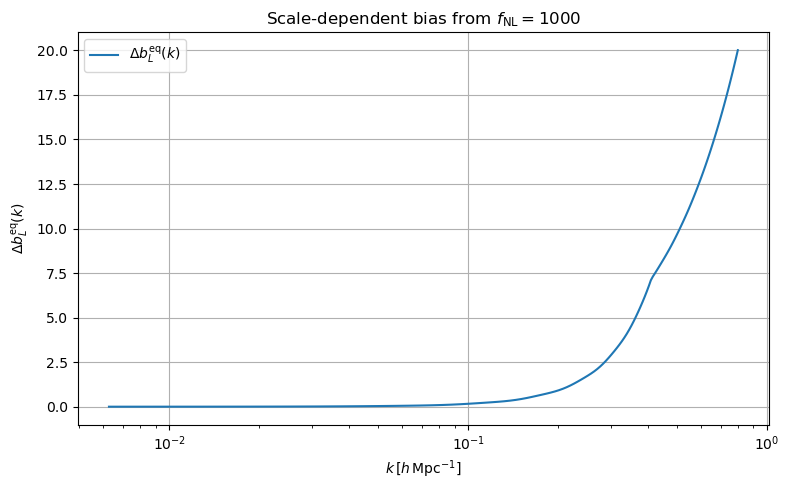

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Constants
f_NL = 1000
delta_c = 1.686
from astropy.constants import G
from astropy import units as u
import numpy as np

# Mass in M_sun/h (e.g., 1e13 Msun/h)
M = 1e13

# Cosmology parameters
h = 0.6766
Omega_m = 0.30964
H0 = 100 * h * u.km / u.s / u.Mpc  # Hubble in physical units
rho_crit = (3 * H0**2) / (8 * np.pi * G)  # critical density in g/cm^3
rho_crit = rho_crit.to(u.Msun / u.Mpc**3)  # convert to Msun/Mpc^3

# Mean matter density
rho_m = Omega_m * rho_crit  # Msun/Mpc^3

# Compute R from M = (4/3) pi R^3 rho_m
R = ((3 * M * u.Msun / (4 * np.pi * rho_m))**(1/3)).to(u.Mpc).value

print(f"R corresponding to M = {M:.1e} Msun/h: {R:.3f}")

b_L = results_G[beta_index][0]  

# Load k^2 / M(k) from file
k_vals = results_NG[0]
# k_vals = np.logspace(-4, 0, 300)
k2_over_M = Plin(k_vals)


P_k = Plin_zout(k_vals)

# Get n_s from cosmology
n_s = 0.9665

# Approximate T(k) (up to normalization) from:
T_k = np.sqrt(P_k / k_vals**n_s)

# Fourier transform of tophat filter
def F_R(k, R):
    kr = k * R
    return 3 * (np.sin(kr) - kr * np.cos(kr)) / (kr**3 + 1e-8)

# Compute σ²_{R,0} and σ²_{R,-2}
FR = F_R(k_vals, R)
sigmaR0_integrand = P_k * FR**2  # n = 0
sigmaRm2_integrand = (k_vals**(-2)) * P_k * FR**2  # n = -2

sigmaR0 = simps(sigmaR0_integrand, x=k_vals) / ((2*np.pi)**3)
sigmaRm2 = simps(sigmaRm2_integrand, x=k_vals) / ((2*np.pi)**3)

# Now compute Δb_L^eq(k)
Delta_b_eq = (6 * f_NL * k2_over_M / T_k) * b_L * delta_c * (sigmaRm2 / sigmaR0)

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_vals, Delta_b_eq, label=r'$\Delta b_L^{\rm eq}(k)$')
plt.xscale('log')
plt.xlabel(r"$k\,[h\,\mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$\Delta b_L^{\rm eq}(k)$")
plt.title("Scale-dependent bias from $f_{\mathrm{NL}} = 1000$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


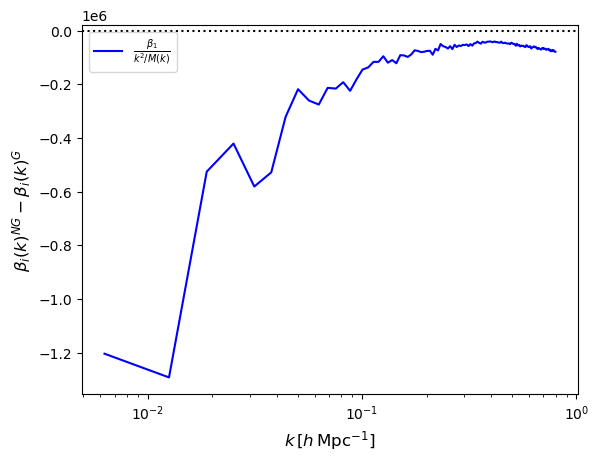

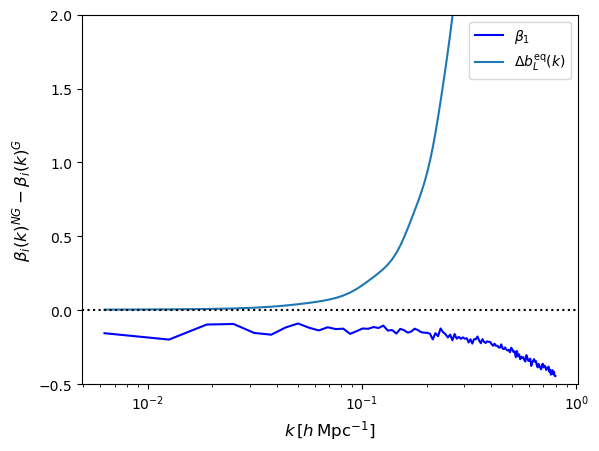

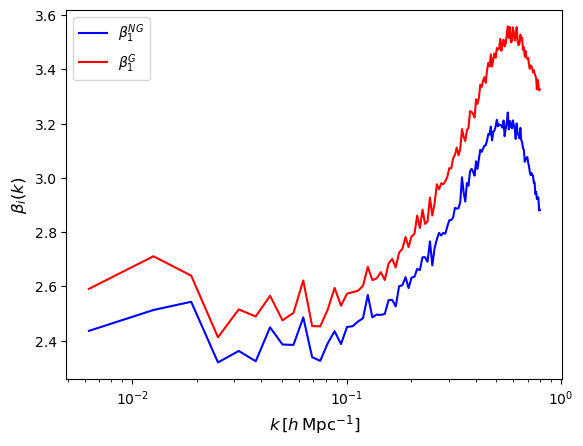

In [8]:
zout = 0.5
Nmesh = 256
sim = 1991
beta_index=5
if beta_index == 5:
    beta = r'\beta_1'
if beta_index == 6:
    beta = r'\beta_2'
if beta_index == 7:
    beta = r'\beta_{G2}'
if beta_index == 8:
    beta = r'\beta_3'

for Mh_bins in [np.array([10**13.5, 10**14.0])]:

        Mmin = np.log10(Mh_bins[0])
        Mmax = np.log10(Mh_bins[1])
        
        results = []
        for sim_type in ['Gaussian', 'nonGaussian']:

            path_to_save = "/global/cfs/cdirs/m4031/divijsharma/PNG/output_folder/Kazu/Quijote_zout_%.1f_grid_Nmesh_%i_sim_%i_simType_%s_Mmin_%.1f_Mmax_%.1f"%(zout, Nmesh, sim, sim_type, Mmin, Mmax)

            results.append(np.load(path_to_save+'.npy'))
        
        results_G = results[0]
        results_NG = results[1]
        
        plt.plot(results_NG[0], (results_NG[beta_index]-results_G[beta_index])/Plin(results_NG[0]), 'b-', label=r'$\frac{%s}{k^2/M(k)}$'%(beta))
        # plt.plot(results_NG[0], results_NG[6]-results_G[6], 'cyan', label=r'$\beta_2$')
        # plt.plot(results_NG[0], results_NG[7]-results_G[7], 'g-', label=r'$\beta_{\mathcal{G}_2}$')
        # plt.plot(results_NG[0], results_NG[8]-results_G[8], 'r-', label=r'$\beta_3$')
        # plt.plot(data[0], data[1])
        plt.axhline(0, color='k', linestyle=':')
        plt.xscale('log')
        # plt.ylim(-0.25, 0.25)
        # plt.yscale('log')
        plt.legend()
        plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
        plt.ylabel(r'$\beta_i(k)^{NG}-\beta_i(k)^{G}$', fontsize=12)
        # plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$'%(Mmin, Mmax), fontsize=12)
        plt.show()
        
        plt.plot(results_NG[0], (results_NG[beta_index]-results_G[beta_index]), 'b-', label=r'${}$'.format(beta))
        plt.plot(k_vals, Delta_b_eq, label=r'$\Delta b_L^{\rm eq}(k)$')
        plt.axhline(0, color='k', linestyle=':')
        plt.xscale('log')
        plt.ylim(-0.5, 2)
        # plt.yscale('log')
        plt.legend()
        plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
        plt.ylabel(r'$\beta_i(k)^{NG}-\beta_i(k)^{G}$', fontsize=12)
        # plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$'%(Mmin, Mmax), fontsize=12)
        plt.show()
        
        plt.plot(results_NG[0], (results_NG[beta_index]), 'b-', label=r'$%s^{NG}$'%(beta))
        plt.plot(results_NG[0], (results_G[beta_index]), 'r-', label=r'$%s^{G}$'%(beta))
        # plt.axhline(0, color='k', linestyle=':')
        plt.xscale('log')
        # plt.ylim(-0.25, 0.25)
        # plt.yscale('log')
        plt.legend()
        plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
        plt.ylabel(r'$\beta_i(k)$', fontsize=12)
        # plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$'%(Mmin, Mmax), fontsize=12)
        plt.show()

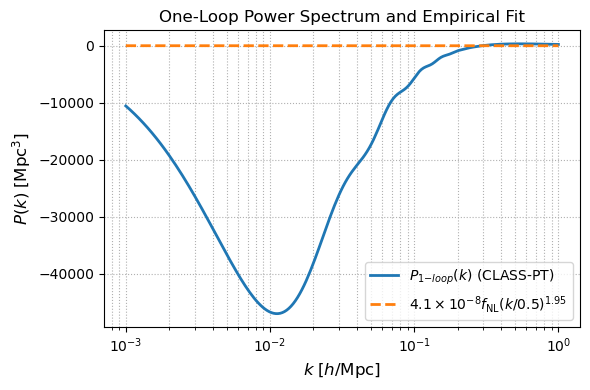

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# 1. Set up cosmology and CLASS-PT configuration
z_pk = 0.5
fNL = 1000
cosmo = Class()
cosmo.set({ 
    # Cosmological parameters (Planck 2018 baseline)
    'A_s': 2.089e-9,
    'n_s': 0.9649,
    'tau_reio': 0.052,
    'omega_b': 0.02237,
    'omega_cdm': 0.12,
    'h': 0.6736,
    'YHe': 0.2425,
    'N_ur': 2.0328,
    'N_ncdm': 1,
    'm_ncdm': 0.06,
    'z_pk': z_pk,
    # CLASS-PT settings for one-loop power spectrum
    'output': 'mPk',             # matter power spectrum output
    'non linear': 'PT',          # enable PT one-loop module:contentReference[oaicite:4]{index=4}
    'IR resummation': 'Yes',     # IR resummation for loop integrals
    'Bias tracers': 'No',        # just matter (no galaxy bias)
    'cb': 'Yes',                 # use CDM+baryon (cb) power spectrum
    'PNG': 'Yes',                # include primordial non-Gaussianity
    # 'fNL_local': 0.0,            # local PNG amplitude (set 0 for none)
    # 'fNL_equilateral': 1000.0,   # equilateral PNG amplitude (fNL = 1000)
    # 'fNL_orthogonal': 0.0        # orthogonal PNG amplitude (none in this case)
})
cosmo.compute()

# 2. Define k range (in 1/Mpc) and compute linear & total P(k) at z=0.5
k_vals = np.logspace(-3, 0, 200)  # k from 1e-3 to 1 (1/Mpc), logarithmic spacing
Pk_linear = np.array([cosmo.pk_lin(k, z_pk) for k in k_vals])
Pk_total  = np.array([cosmo.pk(k, z_pk)[0] for k in k_vals])


# 3. Isolate the one-loop contribution: P1-loop = P_total - P_linear
P1_loop = Pk_total - Pk_linear

# Define and compute the fitted function
P_fit = (2*np.pi**2)/(k_vals**3) * 4.1e-8 * fNL * (k_vals / 0.5)**1.95

# 4. Plot the P1-loop term
plt.figure(figsize=(6, 4))
plt.plot(k_vals, P1_loop, label=r'$P_{1\mathrm{-}loop}(k)$ (CLASS-PT)', lw=2)
plt.plot(k_vals, P_fit, '--', label=r'$4.1 \times 10^{-8} f_{\mathrm{NL}} \left(k/0.5\right)^{1.95}$', lw=2)

plt.xscale('log')
plt.xlabel(r'$k \; [h/\mathrm{Mpc}]$', fontsize=12)
plt.ylabel(r'$P(k) \; [\mathrm{Mpc}^3]$', fontsize=12)
plt.title('One-Loop Power Spectrum and Empirical Fit')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()



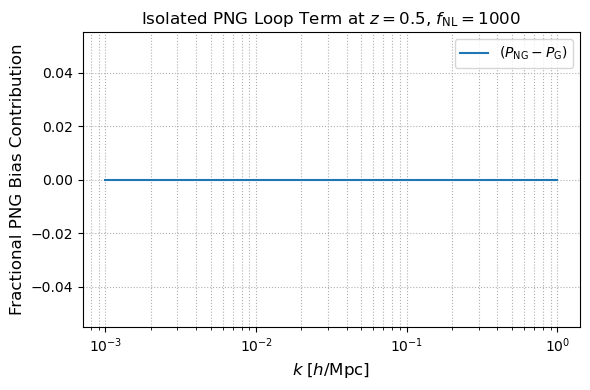

In [18]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

z_pk = 0.5
k_vals = np.logspace(-3, 0, 200)
fNL = 1000

# 1. Compute total P(k) with fNL = 1000, b_zeta = 0
cosmo_NG = Class()
cosmo_NG.set({ 
    # Cosmological parameters (Planck 2018 baseline)
    'A_s': 2.089e-9,
    'n_s': 0.9649,
    'tau_reio': 0.052,
    'omega_b': 0.02237,
    'omega_cdm': 0.12,
    'h': 0.6736,
    'YHe': 0.2425,
    'N_ur': 2.0328,
    'N_ncdm': 1,
    'm_ncdm': 0.06,
    'z_pk': z_pk,
    # CLASS-PT settings for one-loop power spectrum
    'output': 'mPk',             # matter power spectrum output
    'non linear': 'PT',          # enable PT one-loop module:contentReference[oaicite:4]{index=4}
    'IR resummation': 'Yes',     # IR resummation for loop integrals
    'Bias tracers': 'No',        # just matter (no galaxy bias)
    'cb': 'Yes',                 # use CDM+baryon (cb) power spectrum
    'PNG': 'Yes',                # include primordial non-Gaussianity
    # 'fNL_local': 0.0,            # local PNG amplitude (set 0 for none)
    # 'fNL_equilateral': 1000.0,   # equilateral PNG amplitude (fNL = 1000)
    # 'fNL_orthogonal': 0.0        # orthogonal PNG amplitude (none in this case)
})
cosmo_NG.compute()
P_NG = np.array([cosmo_NG.pk(k, z_pk)[0] for k in k_vals])
cosmo_NG.struct_cleanup()

# 2. Compute total P(k) with fNL = 0 (Gaussian)
cosmo_G = Class()
cosmo_G.set({ 
    # Cosmological parameters (Planck 2018 baseline)
    'A_s': 2.089e-9,
    'n_s': 0.9649,
    'tau_reio': 0.052,
    'omega_b': 0.02237,
    'omega_cdm': 0.12,
    'h': 0.6736,
    'YHe': 0.2425,
    'N_ur': 2.0328,
    'N_ncdm': 1,
    'm_ncdm': 0.06,
    'z_pk': z_pk,
    # CLASS-PT settings for one-loop power spectrum
    'output': 'mPk',             # matter power spectrum output
    'non linear': 'PT',          # enable PT one-loop module:contentReference[oaicite:4]{index=4}
    'IR resummation': 'Yes',     # IR resummation for loop integrals
    'Bias tracers': 'No',        # just matter (no galaxy bias)
    'cb': 'Yes',                 # use CDM+baryon (cb) power spectrum
    'PNG': 'No',                # include primordial non-Gaussianity
    # 'fNL_local': 0.0,            # local PNG amplitude (set 0 for none)
    # 'fNL_equilateral': 1000.0,   # equilateral PNG amplitude (fNL = 1000)
    # 'fNL_orthogonal': 0.0        # orthogonal PNG amplitude (none in this case)
})
cosmo_G.compute()
P_G = np.array([cosmo_G.pk(k, z_pk)[0] for k in k_vals])
cosmo_G.struct_cleanup()

# 3. Difference = PNG bias terms (non-Gaussian contribution only)
delta_P_png = P_NG - P_G

# 4. Normalize by linear P(k)
# cosmo_L = Class()
# cosmo_L.set({
#     'output': 'mPk',
#     'z_pk': z_pk,
#     'non linear': 'none',
#     'omega_b': 0.02237,
#     'omega_cdm': 0.12,
#     'h': 0.6736,
#     'n_s': 0.9649,
#     'A_s': 2.1e-9,
# })
# cosmo_L.compute()
# P_lin = np.array([cosmo_L.pk_lin(k, z_pk) for k in k_vals])
# cosmo_L.struct_cleanup()

# # 5. Compute the normalized contribution
# ratio = delta_P_png / P_lin

# 6. Plot
plt.figure(figsize=(6, 4))
plt.plot(k_vals, delta_P_png, label=r'$(P_\mathrm{NG} - P_\mathrm{G})$')
plt.xscale('log')
plt.xlabel(r'$k\;[h/\mathrm{Mpc}]$', fontsize=12)
plt.ylabel(r'Fractional PNG Bias Contribution', fontsize=12)
plt.title(r'Isolated PNG Loop Term at $z=0.5$, $f_\mathrm{NL}=1000$')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


In [27]:
############################################
z_pk = 0.5
  

common_settings = {# fixed LambdaCDM parameters
                   'A_s':2.089e-9,
                   'n_s':0.9649,
                   'tau_reio':0.052,
                   'omega_b':0.02237,
                   'omega_cdm':0.12,
                   'h':0.6736,
                   'YHe':0.2425,
#                     'N_eff':3.046,
                    'N_ur':2.0328,
                    'N_ncdm':1,
                    'm_ncdm':0.06,
                   # other output and precision parameters
#                    'P_k_max_1/Mpc':100.0,
                   'z_pk':z_pk}  

M = Class()
M.set(common_settings)
#let's first take a look at the one-loop power spectrum for matter without IR resummation
M.set({ 'output':'mPk',
       'non linear':'PT',
       'IR resummation':'No',
       'Bias tracers':'No'
       ,'cb':'Yes'
      })
M.compute()
#now we compute all the spectra including IR resummation, RSD, 
#and AP generated for a fiducial cosmology with $\Omega_m=0.31$ 
M1 = Class()
M1.set(common_settings)
M1.set({'output':'mPk',
       'non linear':'PT',
       'IR resummation':'No',
       'Bias tracers':'No'
       ,'cb':'Yes', 
        'PNG': 'Yes'
        
       })
M1.compute()

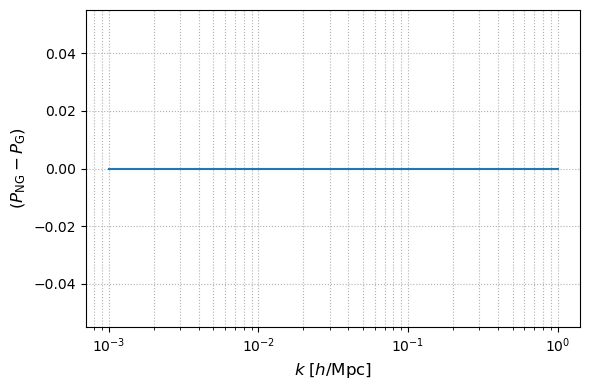

In [28]:
P_NG = np.array([M1.pk(k, z_pk)[0] for k in k_vals])
P_G = np.array([M.pk(k, z_pk)[0] for k in k_vals])

# 3. Difference = PNG bias terms (non-Gaussian contribution only)
delta_P_png = P_NG - P_G

plt.figure(figsize=(6, 4))
plt.plot(k_vals, delta_P_png)
plt.xscale('log')
plt.xlabel(r'$k\;[h/\mathrm{Mpc}]$', fontsize=12)
plt.ylabel(r'$(P_\mathrm{NG} - P_\mathrm{G})$', fontsize=12)
# plt.title(r'Isolated PNG Loop Term at $z=0.5$, $f_\mathrm{NL}=1000$')
# plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


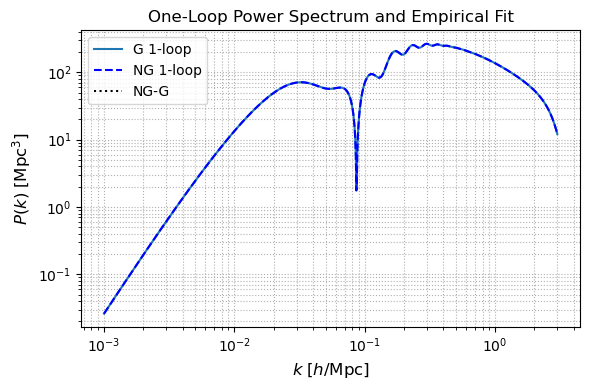

In [40]:
import math
#############################################
#
# extract spectra and plot them
#
#############################################

h = M.h()
fz = M.scale_independent_growth_factor_f(z_pk)
kvec = np.logspace(-3,np.log10(3),1000) # array of kvec in h/Mpc
twopi = 2.*math.pi
khvec = kvec*h # array of kvec in 1/Mpc
#
# Create figures
#
# fig_Pk, ax_Pk = plt.subplots()
# fig_Pkir, ax_Pkir = plt.subplots()
# fig_Pkgg, ax_Pkgg = plt.subplots()
# fig_Pkgm, ax_Pkgm = plt.subplots()
# fig_Pkmz, ax_Pkmz = plt.subplots()
# fig_Pkgz, ax_Pkgz = plt.subplots()

##### NUISANCE PARAMETERS ####
b1 = 2.0
cs = 1. # in units [Mpc/h]^2
b2 = -1.
bG2 = 0.1
bGamma3 = -0.1
Pshot = 5e3 # in units [Mpc/h]^3
cs0 = 5. # in units [Mpc/h]^2
cs2 = 15. # in units [Mpc/h]^2
cs4 = -5. # in units [Mpc/h]^2
b4 = 100. # in units [Mpc/h]^4
##############################

## Initialize the convenience functions pk_mm_real, pk_gg_l0 etc.
M.initialize_output(khvec, z_pk, len(khvec))
M1.initialize_output(khvec, z_pk, len(khvec))

## COMPUTE SPECTRA #######
# NB: these are fast, since no quantities are recomputed

# basic real space matter power spectrum without IR resummation
pk_full = M.pk_mm_real(cs)

# real space matter power spectrum
pk_full_ir = M1.pk_mm_real(cs)

# real space galaxy-galaxy power spectrum 
pk_gg = M1.pk_gg_real(b1, b2, bG2, bGamma3, cs, cs0, Pshot)

# real space galaxy-matter power spectrum 
pk_gm = M1.pk_gm_real(b1, b2, bG2, bGamma3, cs, cs0)

# dark matter redshift space monopole/quadrupole/hexadecapole
pk_m0 = M1.pk_mm_l0(cs0)
pk_m2 = M1.pk_mm_l2(cs2)
pk_m4 = M1.pk_mm_l4(cs4)

# galaxy redshift space monopole/quadrupole/hexadecapole
pk_g0 = M1.pk_gg_l0(b1, b2, bG2, bGamma3, cs0, Pshot, b4)
pk_g2 = M1.pk_gg_l2(b1, b2, bG2, bGamma3, cs2, b4)
pk_g4 = M1.pk_gg_l4(b1, b2, bG2, bGamma3, cs4, b4)
###########################

# Compute additional quantities (which don't have inbuilt wrappers)

# linear theory matter power spectrum
pk_lin = np.asarray([M1.pk_lin(kh,z_pk)*h**3. for kh in khvec])

# load all non-linear components
M1_mult = M1.get_pk_mult(khvec, z_pk, len(khvec))
M_mult = M.get_pk_mult(khvec, z_pk, len(khvec))

# separate contributions of the matter-matter power spectrum
pk_tree = M_mult[14]*h**3.
pk_loop = M_mult[0]*h**3.
pk_ctr = 2*M_mult[10]*h
# separate contributions of the galaxy-galaxy power spectrum
pk_Id2 = (M1_mult[2])*h**3.
pk_IG2 = (M1_mult[3])*h**3. 
pk_Id2d2 = (M1_mult[1])*h**3. 
pk_IG2G2 = (M1_mult[5])*h**3. 
pk_Id2G2 = (M1_mult[4])*h**3. 
pk_FG2 = (M1_mult[6])*h**3.

fNL=1000

# Define and compute the fitted function
P_fit = (2*np.pi**2)/(kvec**3) * 4.1e-8 * fNL * (kvec / 0.5)**1.95

pk_loop_NG = M1_mult[0]*h**3.

plt.figure(figsize=(6, 4))
plt.plot(kvec, np.array(np.abs(pk_loop)),label='G 1-loop')

plt.plot(kvec,np.array(np.abs(pk_loop_NG)),color='b',linestyle='--',label='NG 1-loop')
plt.plot(kvec,np.array(np.abs(pk_loop_NG)) - np.array(np.abs(pk_loop)),color='k',linestyle=':',label='NG-G')

# plt.plot(kvec,np.array(pk_full)*kvec**1.5,color='b',linestyle='--',label='NG 1-loop')
# plt.plot(kvec,np.array(pk_full)*kvec**1.5 - np.array(np.abs(pk_loop)),color='k',linestyle=':',label='NG-G')

# plt.plot(kvec, P_fit, '--', label=r'$4.1 \times 10^{-8} f_{\mathrm{NL}} \left(k/0.5\right)^{1.95}$', lw=2)

plt.xscale('log')
plt.xlabel(r'$k\;[h/\mathrm{Mpc}]$', fontsize=12)
plt.ylabel(r'$P(k) \; [\mathrm{Mpc}^3]$', fontsize=12)
plt.title('One-Loop Power Spectrum and Empirical Fit')
plt.yscale('log')
# plt.title(r'Isolated PNG Loop Term at $z=0.5$, $f_\mathrm{NL}=1000$')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()
    
# ax_Pk.loglog(kvec,np.array(np.abs(pk_loop)),color='purple',linestyle='-',label='1-loop')


In [ ]:
zout = 0.0
Nmesh = 256
sim = 0

for Mh_bins in [np.array([10**13.0, 10**13.5]), np.array([10**13.5, 10**14.0]), np.array([10**14.0, 10**14.5]), np.array([10**14.5, 10**15.0])]:

        Mmin = np.log10(Mh_bins[0])
        Mmax = np.log10(Mh_bins[1])
        
        results = []
        for sim_type in ['Gaussian', 'nonGaussian']:

            path_to_save = "Quijote_zout_%.1f_grid_Nmesh_%i_sim_%i_simType_%s_Mmin_%.1f_Mmax_%.1f"%(zout, Nmesh, sim, sim_type, Mmin, Mmax)

            results.append(np.load(path_to_save+'.npy'))
        
        results_G = results[0]
        results_NG = results[1]
        
        plt.plot(results_NG[0], (results_NG[5]-results_G[5])/Plin(results_NG[0]), 'b-', label=r'$\frac{\beta_1}{k^2/M(k)}$')
        # plt.plot(results_NG[0], results_NG[6]-results_G[6], 'cyan', label=r'$\beta_2$')
        # plt.plot(results_NG[0], results_NG[7]-results_G[7], 'g-', label=r'$\beta_{\mathcal{G}_2}$')
        # plt.plot(results_NG[0], results_NG[8]-results_G[8], 'r-', label=r'$\beta_3$')
        # plt.plot(data[0], data[1])
        plt.axhline(0, color='k', linestyle=':')
        plt.xscale('log')
        # plt.ylim(-0.25, 0.25)
        # plt.yscale('log')
        plt.legend()
        plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
        plt.ylabel(r'$\beta_i(k)^{NG}-\beta_i(k)^{G}$', fontsize=12)
        plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$'%(Mmin, Mmax), fontsize=12)
        plt.show()
        
        plt.plot(results_NG[0], (results_NG[5]-results_G[5]), 'b-', label=r'$\beta_1$')
        plt.axhline(0, color='k', linestyle=':')
        plt.xscale('log')
        # plt.ylim(-0.25, 0.25)
        # plt.yscale('log')
        plt.legend()
        plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
        plt.ylabel(r'$\beta_i(k)^{NG}-\beta_i(k)^{G}$', fontsize=12)
        plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$'%(Mmin, Mmax), fontsize=12)
        plt.show()
        
        plt.plot(results_NG[0], (results_NG[5]), 'b-', label=r'$\beta_1^{NG}$')
        plt.plot(results_NG[0], (results_G[5]), 'r-', label=r'$\beta_1^{G}$')
        # plt.axhline(0, color='k', linestyle=':')
        plt.xscale('log')
        # plt.ylim(-0.25, 0.25)
        # plt.yscale('log')
        plt.legend()
        plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
        plt.ylabel(r'$\beta_i(k)$', fontsize=12)
        plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$'%(Mmin, Mmax), fontsize=12)
        plt.show()

In [10]:
#script to average over many sims

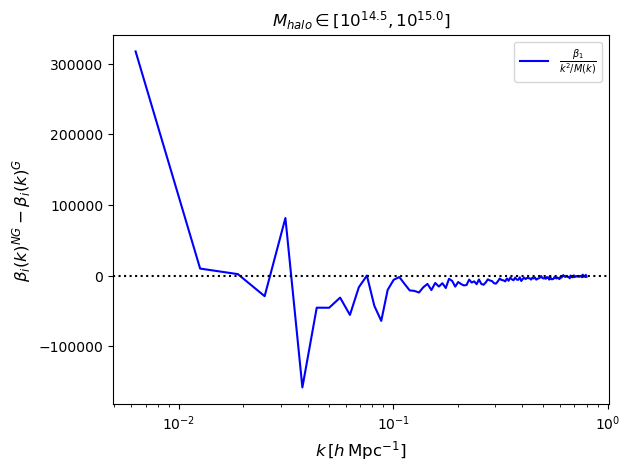

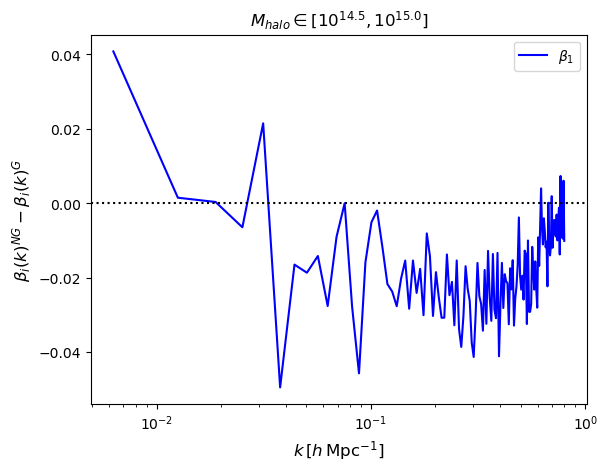

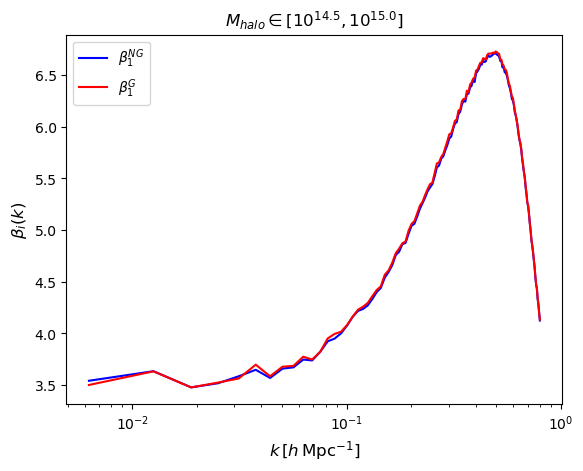

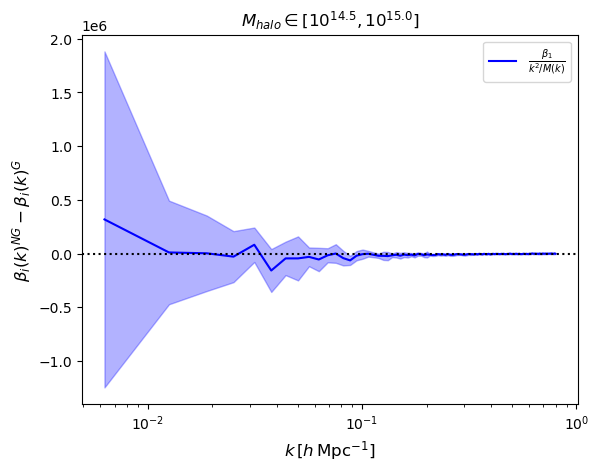

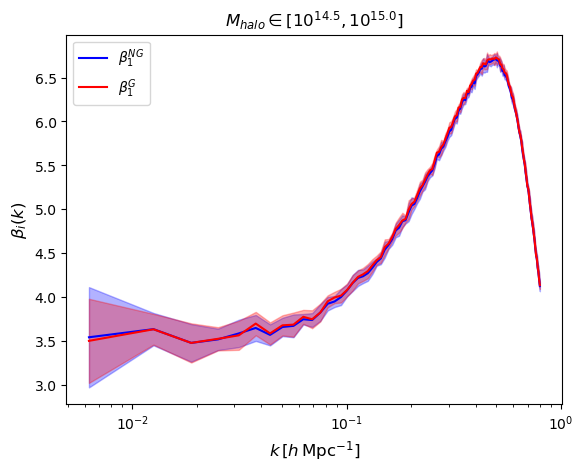

Best-fit theta: -7967.7712334672315


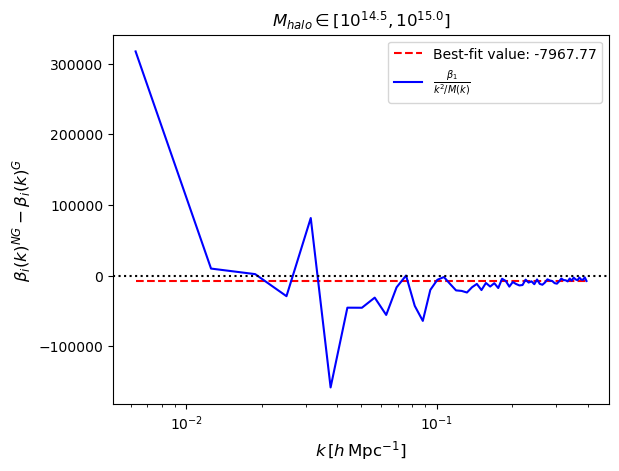

In [40]:
zout = 0.0
Nmesh = 256

cum_results_NG = []
cum_results_G = []
for sim in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    for Mh_bins in [np.array([10**14.5, 10**15.0])]:

            Mmin = np.log10(Mh_bins[0])
            Mmax = np.log10(Mh_bins[1])

            results = []
            for sim_type in ['Gaussian', 'nonGaussian']:

                path_to_save = "Quijote_zout_%.1f_grid_Nmesh_%i_sim_%i_simType_%s_Mmin_%.1f_Mmax_%.1f"%(zout, Nmesh, sim, sim_type, Mmin, Mmax)

                results.append(np.load(path_to_save+'.npy'))

            results_G = results[0]
            results_NG = results[1]
            
            cum_results_G.append(results_G)
            cum_results_NG.append(results_NG)

cum_results_G = np.array(cum_results_G)
cum_results_NG = np.array(cum_results_NG)

            
plt.plot(results_NG[0], (np.mean((cum_results_NG-cum_results_G)[:, 5, :], axis=0))/Plin(results_NG[0]), 'b-', label=r'$\frac{\beta_1}{k^2/M(k)}$')
# plt.plot(results_NG[0], results_NG[6]-results_G[6], 'cyan', label=r'$\beta_2$')
# plt.plot(results_NG[0], results_NG[7]-results_G[7], 'g-', label=r'$\beta_{\mathcal{G}_2}$')
# plt.plot(results_NG[0], results_NG[8]-results_G[8], 'r-', label=r'$\beta_3$')
# plt.plot(data[0], data[1])
plt.axhline(0, color='k', linestyle=':')
plt.xscale('log')
# plt.ylim(-0.25, 0.25)
# plt.yscale('log')
plt.legend()
plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
plt.ylabel(r'$\beta_i(k)^{NG}-\beta_i(k)^{G}$', fontsize=12)
plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$'%(Mmin, Mmax), fontsize=12)
plt.show()

plt.plot(results_NG[0], (np.mean((cum_results_NG-cum_results_G)[:, 5, :], axis=0)), 'b-', label=r'$\beta_1$')
plt.axhline(0, color='k', linestyle=':')
plt.xscale('log')
# plt.ylim(-0.25, 0.25)
# plt.yscale('log')
plt.legend()
plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
plt.ylabel(r'$\beta_i(k)^{NG}-\beta_i(k)^{G}$', fontsize=12)
plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$'%(Mmin, Mmax), fontsize=12)
plt.show()

plt.plot(results_NG[0], np.mean(cum_results_NG[:, 5, :], axis=0), 'b-', label=r'$\beta_1^{NG}$')
plt.plot(results_NG[0], np.mean(cum_results_G[:, 5, :], axis=0), 'r-', label=r'$\beta_1^{G}$')
# plt.axhline(0, color='k', linestyle=':')
plt.xscale('log')
# plt.ylim(-0.25, 0.25)
# plt.yscale('log')
plt.legend()
plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
plt.ylabel(r'$\beta_i(k)$', fontsize=12)
plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$'%(Mmin, Mmax), fontsize=12)
plt.show()


#additional
cum_results_G = np.array(cum_results_G)
cum_results_NG = np.array(cum_results_NG)

# Calculate mean and standard deviation
mean_diff = np.mean((cum_results_NG - cum_results_G)[:, 5, :], axis=0)
std_diff = np.std((cum_results_NG - cum_results_G)[:, 5, :], axis=0)

mean_NG = np.mean(cum_results_NG[:, 5, :], axis=0)
std_NG = np.std(cum_results_NG[:, 5, :], axis=0)

mean_G = np.mean(cum_results_G[:, 5, :], axis=0)
std_G = np.std(cum_results_G[:, 5, :], axis=0)

# Plotting with shaded standard deviation bands
k_vals = results_NG[0]  # Assuming `results_NG[0]` is your x-axis data

# Plot 1: Mean difference with standard deviation as shaded region
plt.plot(k_vals, mean_diff / Plin(k_vals), 'b-', label=r'$\frac{\beta_1}{k^2/M(k)}$')
plt.fill_between(k_vals, (mean_diff - std_diff) / Plin(k_vals), (mean_diff + std_diff) / Plin(k_vals), color='b', alpha=0.3)
plt.axhline(0, color='k', linestyle=':')
plt.xscale('log')
plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
plt.ylabel(r'$\beta_i(k)^{NG}-\beta_i(k)^{G}$', fontsize=12)
plt.legend()
plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$' % (Mmin, Mmax), fontsize=12)
plt.show()

# Plot 2: Mean NG with standard deviation
plt.plot(k_vals, mean_NG, 'b-', label=r'$\beta_1^{NG}$')
plt.fill_between(k_vals, mean_NG - std_NG, mean_NG + std_NG, color='b', alpha=0.3)
plt.plot(k_vals, mean_G, 'r-', label=r'$\beta_1^{G}$')
plt.fill_between(k_vals, mean_G - std_G, mean_G + std_G, color='r', alpha=0.3)
plt.xscale('log')
plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
plt.ylabel(r'$\beta_i(k)$', fontsize=12)
plt.legend()
plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$' % (Mmin, Mmax), fontsize=12)
plt.show()


# Assuming you have already calculated mean_diff and std_diff from previous steps
# Define the subset of k values and corresponding mean and std difference data
k_vals = results_NG[0]
mask = k_vals <= 0.4
k_subset = k_vals[mask]
mean_diff_subset = mean_diff[mask] / Plin(k_subset)
std_diff_subset = std_diff[mask] / Plin(k_subset)

# Define the negative log-likelihood function
def neg_log_likelihood(theta):
    # Model prediction (constant value across all k bins)
    model = theta * np.ones_like(mean_diff_subset)
    # Gaussian negative log-likelihood with 1/k weight
    weighted_diff = (mean_diff_subset - model) / std_diff_subset
    log_likelihood = -0.5 * np.sum((1 / k_subset) * weighted_diff ** 2)
    return -log_likelihood  # Minimize the negative log-likelihood

# Initial guess for theta
theta_init = 0.0

# Minimize the negative log-likelihood
result = minimize(neg_log_likelihood, theta_init)

# Optimal value for theta
theta_best = result.x[0]
print("Best-fit theta:", theta_best)
plt.plot(k_subset, [theta_best] * len(k_subset), 'r--', label=f'Best-fit value: {theta_best:.2f}')
plt.plot(k_subset, mean_diff_subset, 'b-', label=r'$\frac{\beta_1}{k^2/M(k)}$')
# plt.fill_between(k_vals, (mean_diff - std_diff) / Plin(k_vals), (mean_diff + std_diff) / Plin(k_vals), color='b', alpha=0.3)
plt.axhline(0, color='k', linestyle=':')
plt.xscale('log')
plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
plt.ylabel(r'$\beta_i(k)^{NG}-\beta_i(k)^{G}$', fontsize=12)
plt.legend()
plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$' % (Mmin, Mmax), fontsize=12)
plt.show()

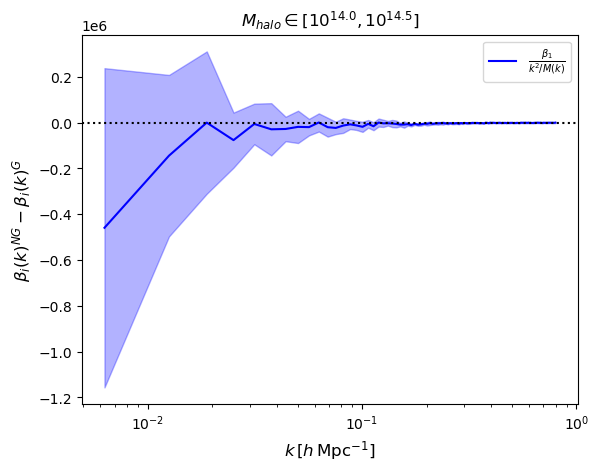

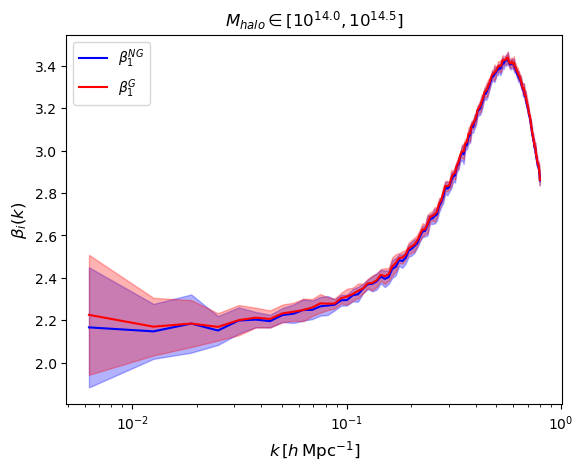

In [30]:
cum_results_G = np.array(cum_results_G)
cum_results_NG = np.array(cum_results_NG)

# Calculate mean and standard deviation
mean_diff = np.mean((cum_results_NG - cum_results_G)[:, 5, :], axis=0)
std_diff = np.std((cum_results_NG - cum_results_G)[:, 5, :], axis=0)

mean_NG = np.mean(cum_results_NG[:, 5, :], axis=0)
std_NG = np.std(cum_results_NG[:, 5, :], axis=0)

mean_G = np.mean(cum_results_G[:, 5, :], axis=0)
std_G = np.std(cum_results_G[:, 5, :], axis=0)

# Plotting with shaded standard deviation bands
k_vals = results_NG[0]  # Assuming `results_NG[0]` is your x-axis data

# Plot 1: Mean difference with standard deviation as shaded region
plt.plot(k_vals, mean_diff / Plin(k_vals), 'b-', label=r'$\frac{\beta_1}{k^2/M(k)}$')
plt.fill_between(k_vals, (mean_diff - std_diff) / Plin(k_vals), (mean_diff + std_diff) / Plin(k_vals), color='b', alpha=0.3)
plt.axhline(0, color='k', linestyle=':')
plt.xscale('log')
plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
plt.ylabel(r'$\beta_i(k)^{NG}-\beta_i(k)^{G}$', fontsize=12)
plt.legend()
plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$' % (Mmin, Mmax), fontsize=12)
plt.show()

# Plot 2: Mean NG with standard deviation
plt.plot(k_vals, mean_NG, 'b-', label=r'$\beta_1^{NG}$')
plt.fill_between(k_vals, mean_NG - std_NG, mean_NG + std_NG, color='b', alpha=0.3)
plt.plot(k_vals, mean_G, 'r-', label=r'$\beta_1^{G}$')
plt.fill_between(k_vals, mean_G - std_G, mean_G + std_G, color='r', alpha=0.3)
plt.xscale('log')
plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
plt.ylabel(r'$\beta_i(k)$', fontsize=12)
plt.legend()
plt.title(r'$M_{halo} \in [10^{%.1f}, 10^{%.1f}]$' % (Mmin, Mmax), fontsize=12)
plt.show()

In [ ]:
print(results_NG.shape)

In [ ]:
plt.plot(results_NG[0], results_NG[3])
plt.xscale('log')
plt.yscale('log')

In [ ]:
results_G = np.load('Quijote_zout_1.0_grid_Nmesh_256_sim_0_simType_Gaussian.npy')

In [ ]:
plt.plot(results_G[0], results_G[3])
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.plot(results_G[0], results_G[5], 'b:')
plt.xscale('log')

In [ ]:
print(data.shape)

In [ ]:
Plin = interpolate.InterpolatedUnivariateSpline(data[:,0],data[:,1],ext=3)

In [ ]:
plt.plot(results_NG[0], (results_NG[5]-results_G[5])/Plin(results_NG[0]), 'b-')
# plt.plot(results_NG[0], results_NG[6]-results_G[6], 'cyan', label=r'$\beta_2$')
# plt.plot(results_NG[0], results_NG[7]-results_G[7], 'g-', label=r'$\beta_{\mathcal{G}_2}$')
# plt.plot(results_NG[0], results_NG[8]-results_G[8], 'r-', label=r'$\beta_3$')
# plt.plot(data[0], data[1])
plt.axhline(0, color='k', linestyle=':')


plt.xscale('log')
# plt.ylim(-0.25, 0.25)
# plt.yscale('log')
plt.legend()
plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$", fontsize=12)
plt.ylabel(r'$\beta_i(k)^{NG}-\beta_i(k)^{G}$', fontsize=12)
plt.savefig('PNG.pdf')

In [ ]:
plt.plot(data[0], data[1])

In [ ]:
data = np.loadtxt("k2overM.txt")

In [ ]:
with open("k2overM.txt", "r") as file:
    data = file.read()
    print(data)

/tmp/ipykernel_2151873/2906964606.py:24: RuntimeWarning: divide by zero encountered in true_divide
  vr = Mdot / (2 * np.pi * r * rho * H)


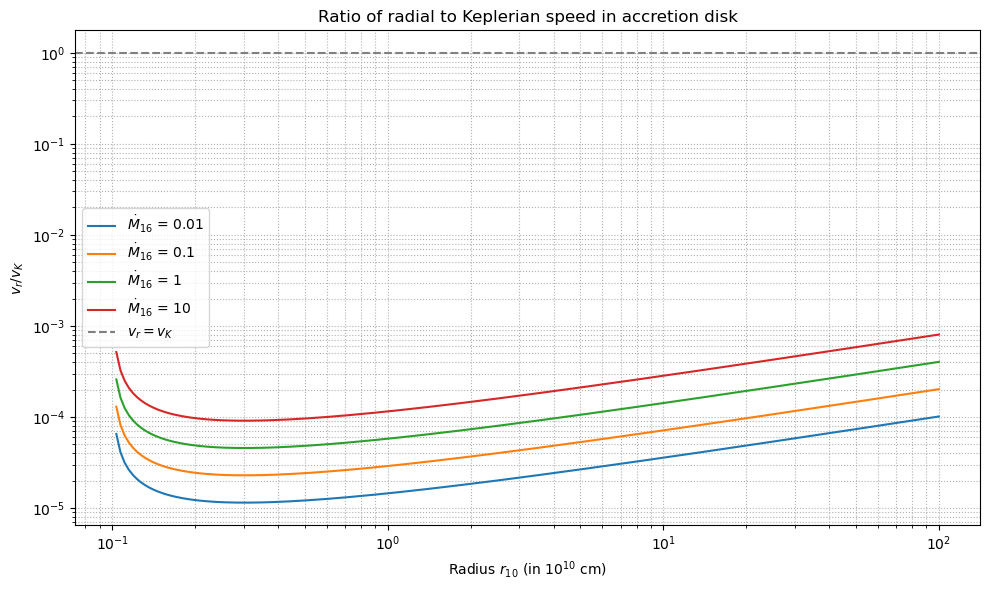

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-8          # cm^3 g^-1 s^-2
Msun = 1.989e33         # g
alpha = 0.1
M_star = 0.5 * Msun     # neutron star mass
r0 = 0.1                # inner edge of the disk in units of r_10

# Grid of r_10 and Mdot_16 values
r10_vals = np.logspace(-1, 2, 200)  # radius in units of 10^10 cm
Mdot16_vals = [0.01, 0.1, 1, 10]    # mass accretion rate in 10^16 g/s

plt.figure(figsize=(10, 6))

for Mdot16 in Mdot16_vals:
    r = r10_vals * 1e10  # convert r10 to cm
    f = (1 - np.sqrt(r0 / r10_vals))**0.25
    H = 1e8 * alpha**(-1/10) * Mdot16**(3/20) * r10_vals**(9/10) * f**(3/5)
    rho = 7e-8 * alpha**(-7/10) * Mdot16**(11/20) * r10_vals**(-15/8) * f**(11/5)
    
    Mdot = Mdot16 * 1e16  # g/s
    vr = Mdot / (2 * np.pi * r * rho * H)
    vk = np.sqrt(G * M_star / r)

    ratio = vr / vk
    plt.plot(r10_vals, ratio, label=f"$\\dot{{M}}_{{16}}$ = {Mdot16}")

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Radius $r_{10}$ (in $10^{10}$ cm)")
plt.ylabel("$v_r / v_K$")
plt.title("Ratio of radial to Keplerian speed in accretion disk")
plt.axhline(1, color='gray', linestyle='--', label='$v_r = v_K$')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


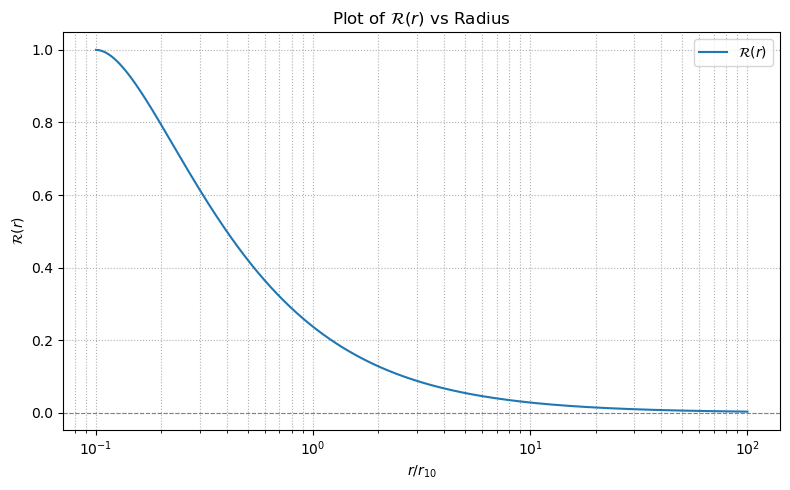

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define R(r) function
def R_r(r, r0):
    ratio = r0 / r
    return 3 * (ratio - (2/3) * ratio**(1.5))

# Parameters
r0 = 0.1  # in units of r_10
r_vals = np.logspace(-1, 2, 500)  # r/r_10 from 0.1 to 100

# Compute R(r)
R_vals = R_r(r_vals, r0)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(r_vals, R_vals, label=r'$\mathcal{R}(r)$')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xscale('log')
plt.xlabel(r"$r/r_{10}$")
plt.ylabel(r"$\mathcal{R}(r)$")
plt.title("Plot of $\mathcal{R}(r)$ vs Radius")
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()
